In [1]:
%load_ext autoreload
%autoreload 2

# Introdução
1. Estudar a equação que passa de RGB para tons de cinza e avaliar se for realizada a média das camadas
2. Converter as imagens de RGB para HSI
3. Identificar as cores que tem na imagem (escolhendo as doze cores principais e apresentar de forma de histograma)
4. Identificar os objetos usando as cores
5. Identificar a intensidade das imagens usadas para apresentar a mudança de contraste

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio

In [3]:
def comparar_imgs(img_01, img_02):
    plt.figure(figsize=(17,12))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.imshow(img_01, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.imshow(img_02, cmap='gray')
    plt.show()
       
    (score2) = peak_signal_noise_ratio(img_01, img_02)
    print('PSNR',score2)
    
    print('')
    (score,a) = structural_similarity(img_01, img_02, full=True)
    print("SSIM",score)

In [4]:
imgs_list = glob.glob('../imgs_pdi/*')

In [5]:
imgs_list

['../imgs_pdi/pelagem.jpg',
 '../imgs_pdi/paisagem.jpg',
 '../imgs_pdi/pedestres02.jpg',
 '../imgs_pdi/cubo_magico.jpg',
 '../imgs_pdi/pre-historia01.jpeg',
 '../imgs_pdi/rainbow-fruits.jpg',
 '../imgs_pdi/leao.jpeg',
 '../imgs_pdi/pre-historia02.jpeg']

# Questão 01

In [6]:
img = imgs_list[3]

In [7]:
img_gray = cv2.imread(img, 0)

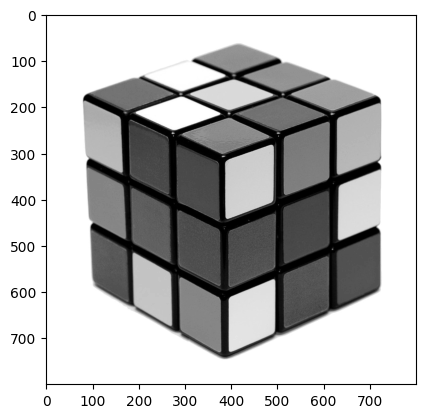

In [8]:
figura = plt.figure()
plt.imshow(img_gray, cmap='gray')

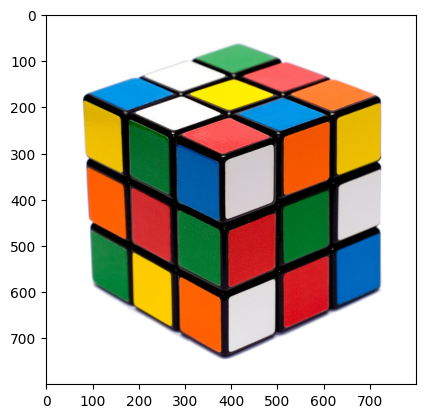

In [9]:
img_rgb = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap='gray')

In [10]:
# B,G,R = cv2.split(img_rgb)

In [11]:
sum_B_G_R = img_rgb.sum(axis=2)

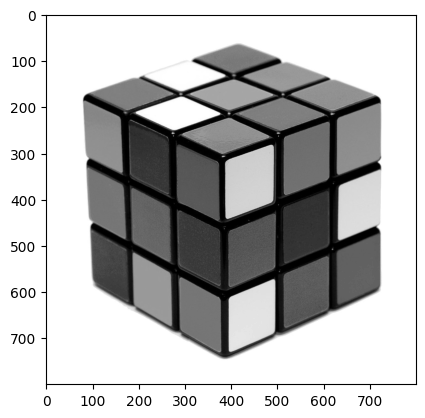

In [12]:
plt.imshow((sum_B_G_R/3), cmap='gray')

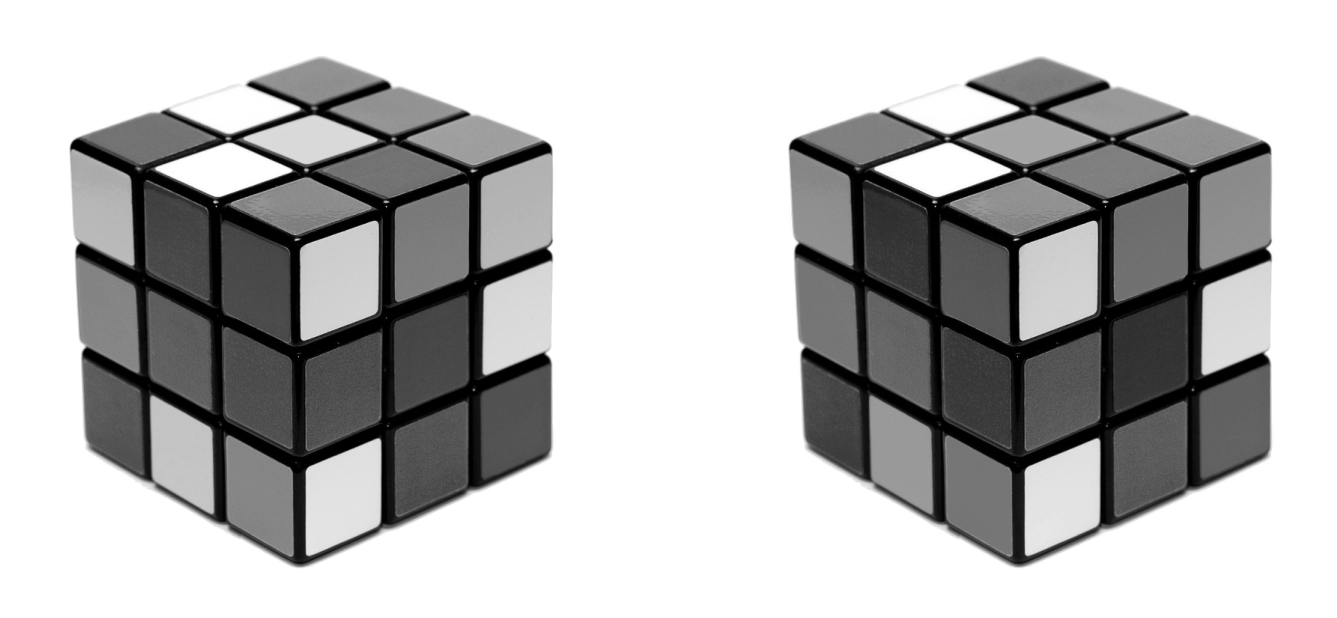

PSNR 26.176093535047023

SSIM 0.9890713599289801


/tmp/ipykernel_44234/2012296302.py:11: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  (score2) = peak_signal_noise_ratio(img_01, img_02)
/home/pedrodsk/anaconda3/envs/pdi/lib/python3.8/site-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [13]:
comparar_imgs(img_gray,(sum_B_G_R/3))

# Questões 02 e 03

![HSV no python](../imgs_aux/hsv_python.png "HSV no python")

In [14]:
height = 5
width = 5
channels = 3
img_red = np.zeros((height, width, channels), np.uint8)
img_red[:] = (255, 0, 0)

img_green = np.zeros((height, width, channels), np.uint8)
img_green[:] = (0, 255, 0)

img_blue = np.zeros((height, width, channels), np.uint8)
img_blue[:] = (0, 0, 255)

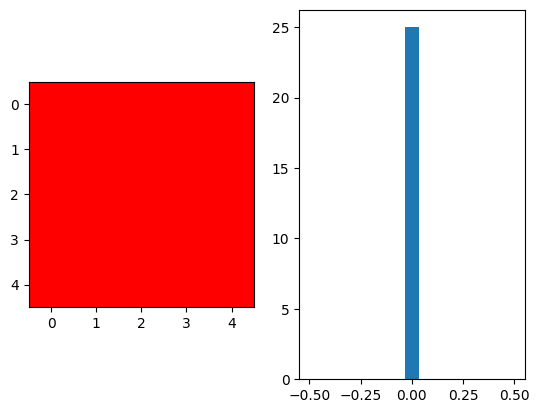

In [15]:
hsv_red = cv2.cvtColor(img_red, cv2.COLOR_RGB2HSV)
H_red, S_red, V_red = cv2.split(hsv_red)

plt.subplot(1,2,1)
plt.imshow(img_red)
plt.subplot(1,2,2)
plt.hist(H_red.ravel(),bins=15)
plt.show()

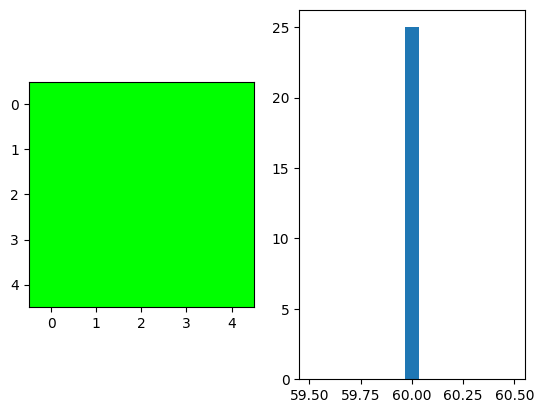

In [16]:
hsv_green = cv2.cvtColor(img_green, cv2.COLOR_RGB2HSV)
H_green, S_green, V_green = cv2.split(hsv_green)

plt.subplot(1,2,1)
plt.imshow(img_green)
plt.subplot(1,2,2)
plt.hist(H_green.ravel(),bins=15)
plt.show()

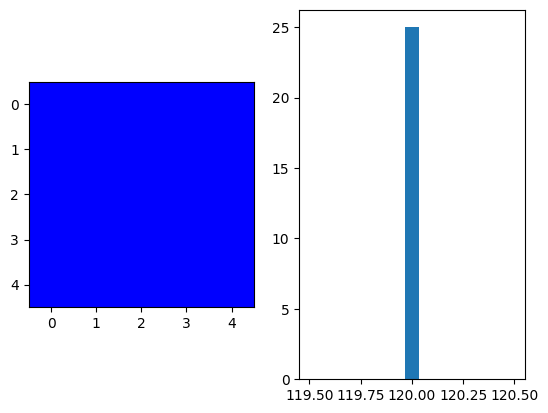

In [17]:
hsv_blue = cv2.cvtColor(img_blue, cv2.COLOR_RGB2HSV)
H_blue, S_blue, V_blue = cv2.split(hsv_blue)

plt.subplot(1,2,1)
plt.imshow(img_blue)
plt.subplot(1,2,2)
plt.hist(H_blue.ravel(),bins=15)
plt.show()

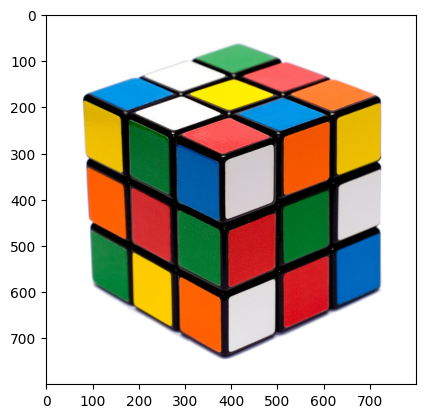

In [18]:
plt.imshow(img_rgb)

In [19]:
img_hsv = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2HSV)

In [20]:
H, S, V = cv2.split(img_hsv)

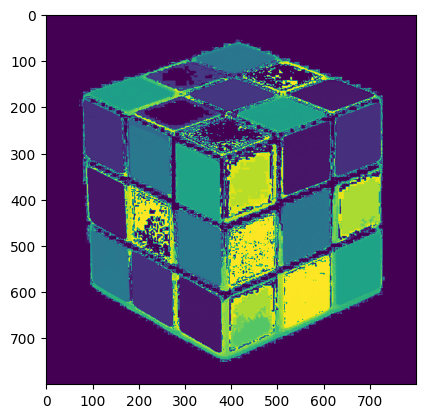

In [21]:
plt.imshow(H)

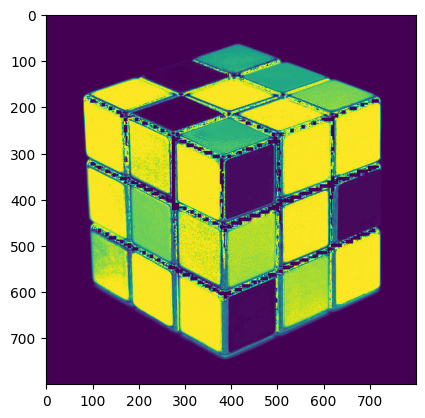

In [22]:
plt.imshow(S)

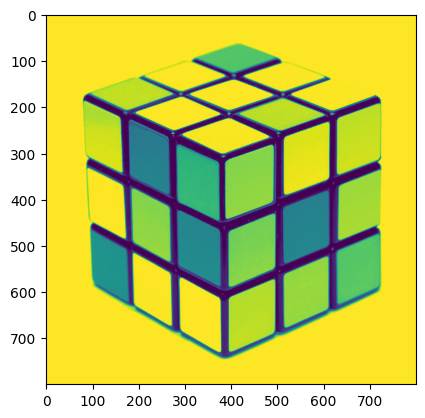

In [23]:
plt.imshow(V)

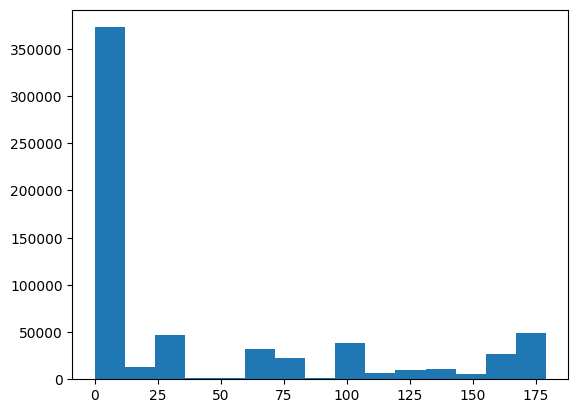

In [24]:
plt.hist(H.ravel(),bins=15)
plt.show()

# Questão 04

In [25]:
def extract_color(img_hsv, lower=[0,0,0], higher=[0,0,0]):
    
    lower_hsv_1 = np.array(lower)
    higher_hsv_1 = np.array(higher)
    mask= cv2.inRange(img_hsv, lower_hsv_1,higher_hsv_1)
    preprocess_img = cv2.bitwise_and(img_hsv, img_hsv ,mask=mask)
    return preprocess_img, mask

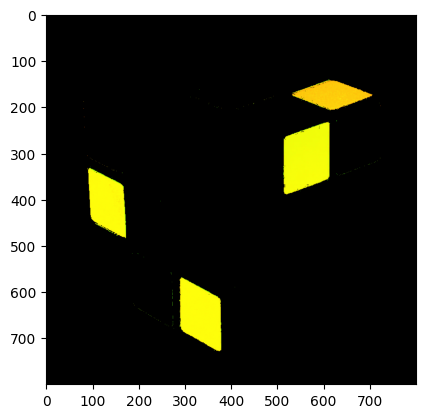

In [61]:
lower = [10, 80, 40]
higher = [15, 255, 255]

preprocess_img, mask = extract_color(img_hsv, lower, higher)

plt.imshow(cv2.cvtColor(preprocess_img, cv2.COLOR_BGR2RGB))

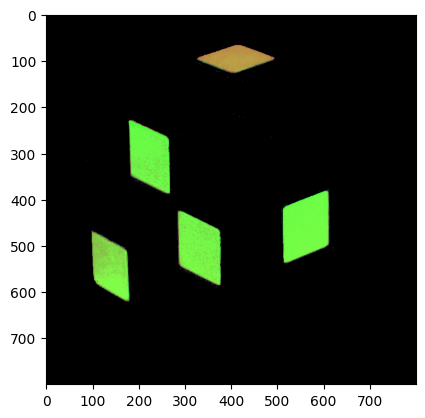

In [27]:
lower = [45, 10, 20]
higher = [75, 255, 255]

preprocess_img, mask = extract_color(img_hsv, lower, higher)

plt.imshow(cv2.cvtColor(preprocess_img, cv2.COLOR_BGR2RGB))

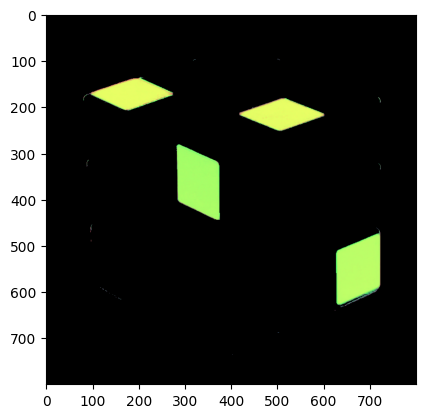

In [28]:
lower = [90, 80, 60]
higher = [120, 255, 255]

preprocess_img, mask = extract_color(img_hsv, lower, higher)

plt.imshow(cv2.cvtColor(preprocess_img, cv2.COLOR_BGR2RGB))

# Questão 05

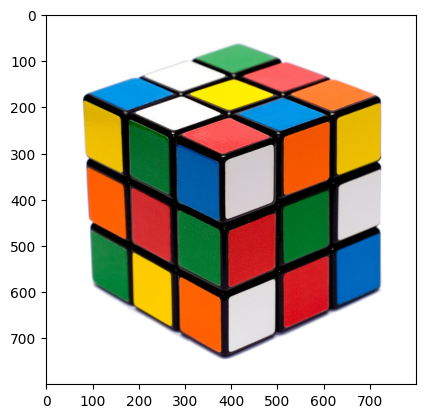

In [63]:
plt.imshow(img_rgb)

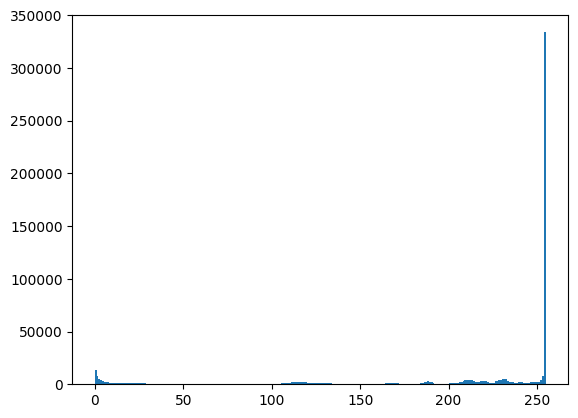

In [68]:
plt.hist(V.ravel(),bins=255)
plt.show()

In [71]:
img_hsv[:,:,2] = 255

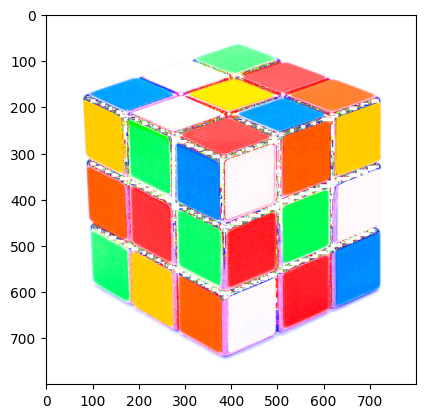

In [72]:
img_rgb2 = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb2)